# Notebook Exercise 1: Mean and Standard Deviation

Welcome! This workshop is from [WinderResearch.com](https://WinderResearch.com/?utm_source=trainingdatascience&utm_medium=notebook&utm_campaign=workshop&utm_term=individual).

If you like this then please visit my website, [tweet @DrPhilWinder](https://twitter.com/DrPhilWinder) or get in touch via [Linkedin](https://www.linkedin.com/in/DrPhilWinder/) or plain old [email](mailto:phil@WinderResearch.com).

In this warm up, I want to explain two fundamental measures of data. I want to you start thinking about how you can best describe or summarise data. How can we best take a set of data and describe that data in as few variables as possible? These are called _summary statistics_ because they summarise statistical data. They are a model!

In [0]:
import numpy as np

## Mean

The _mean_, also known as the average, is a measure of the tendency of the data. For example, if you were provided some data then you could say that, on average, is most likely best represented by the mean.

The mean is calculated as:

$$\mu = \frac{\sum_{i=0}^{N-1}{ x_i }} {N}$$

The sum of all observations divided by the number of observations.

In [0]:
x = [6, 4, 6, 9, 4, 4, 9, 7, 3, 6];

In [47]:
N = len(x)
x_sum = 0
for i in range(N):
    x_sum = x_sum + x[i]
mu = x_sum / N
print("μ =", mu)

μ = 5.8


Of course, we should be using libraries to reduce the amount of code we have to write. For low level tasks such as this, the most common library is called Numpy.

We can rewrite the above as:

In [48]:
N = len(x)
x_sum = np.sum(x)
mu = x_sum / N
print("μ =", mu)

μ = 5.8


We can take this even further and just use Numpy's implementation of the mean:

In [49]:
print("μ =", np.mean(x))

μ = 5.8


## Standard Deviation

To describe our data, the mean alone doesn't provide enough information. It tells us what value we should observe on average. But the values could be +/- 1 or +/- 100 of that value. (+/- is shorthand for "plus or minus", i.e. "could be greater than or less than this value").

To provide this information we need a measure of "spread" around the mean. The most common measure of "spread" is the _standard deviation_.

Read more about the standard deviation at: [TrainingDataScience.com - Why do we use Standard Deviation and is it Right?](https://trainingdatascience.com/tips/why-do-we-use-standard-deviation/?utm_source=trainingdatascience&utm_medium=notebook&utm_campaign=workshop&utm_term=individual).

The standard deviation of a population is:

$$\sigma = \sqrt{ \frac{\sum_{i=0}^{N-1}{ (x_i - \mu )^2 }} {N} }$$

In [0]:
x = [6, 4, 6, 9, 4, 4, 9, 7, 3, 6];

In [51]:
N = len(x)
mu = np.mean(x)
print("μ =", mu)

μ = 5.8


In [52]:
print("Deviations from the mean:", x - mu)
print("Squared deviations from the mean:", (x - mu)**2)
print("Sum of squared deviations from the mean:", ((x - mu)**2).sum() )
print("Mean of squared deviations from the mean:", ((x - mu)**2).sum() / N )

Deviations from the mean: [ 0.2 -1.8  0.2  3.2 -1.8 -1.8  3.2  1.2 -2.8  0.2]
Squared deviations from the mean: [ 0.04  3.24  0.04 10.24  3.24  3.24 10.24  1.44  7.84  0.04]
Sum of squared deviations from the mean: 39.6
Mean of squared deviations from the mean: 3.96


In [53]:
print("σ =", np.sqrt(((x - mu)**2).sum() / N ))

σ = 1.98997487421324


Again, we don't need to code this all up. The Numpy equivalent is:

In [54]:
print("σ =", np.std(x))

σ = 1.98997487421324


## What's the Catch?

You knew they'd be a catch, right? ;-)

I didn't mention it at the start, but the two previous measures of the central tendency and the spread are specific to a very special combination of data.

If the observations are _distributed_ in a special way, then these metrics perfectly _model_ the underlying data. If not, then these metrics are invalid.

# Notebook Exercise 2: Evidence and Probabilities

Bayes rule is one of the most useful parts of statistics. It allows us to estimate probabilities that would otherwise be impossible.

In this worksheet we look at bayes at a basic level, then try a naive classifier.

## Bayes Rule

Following on from the previous marketing examples, consider the following situation. You have already developed a model that decides to either show and advert, or not show an advert, to a set of customers.


Your boss has come back with some results and says:

> "We're going to ask you to develop a new model, but first we need a baseline to compare against. Can you tell me what is the probability that a customer will buy our product, given that they have seen your advert?".

We notice the word "given" in the sentence and we release that we can use bayes rule:

$p(B \vert A) = \frac{p(B) \times p(A \vert B)}{p(A)} = \frac{p(B) \times p(A \vert B)}{p(B) \times p(A \vert B) + p(notB) \times p(A \vert notB)}$

Where $A$ is being shown the advert and $B$ is buy our product.

Next, she provides the following statistics from the previous experiment:

- 10 people bought product after being shown the advert. (TP)
- 1000 people were not shown the advert and didn't buy. (TN)
- 50 people were shown the advert, but didn't buy. (FP)
- And 5 people bought our product without being shown any advert. (FN)

- 10 true positives. 10 people bought product.
- 1000 true negatives. Not shown advert.
- 50 false positives. They didn't buy, but were shown the advert.
- 5 false negatives, people bought even though they weren't shown the advert.

| |p | n|
|--|--|--|
|Y|10|50|
|N|5|1000|

In [55]:
T = 1000+50+10+5
p_buy = (10+5)/T
p_ad_buy = 10/15
p_notbuy = (1000+50)/T
p_ad_notbuy = 50/1050
p_buy_ad = p_buy * p_ad_buy / (p_buy * p_ad_buy + p_notbuy * p_ad_notbuy)

print("p(buy|ad) = %0.1f%%" % (p_buy_ad*100))

p(buy|ad) = 16.7%


## Naive Bayes Classifier

Now let's try a naive bayes classifier. Once again, sklearn makes this very easy.

Tasks:

- Classify the iris dataset
- Print the confusion matrix
- Print and investigate the resulting probabilities
- Plot the ROC curves

In [56]:
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [57]:
gnb = GaussianNB()
mdl = gnb.fit(iris.data, iris.target) # Tut, tut. We should really be splitting the training/test set.
y_pred = mdl.predict(iris.data)
cm = metrics.confusion_matrix(iris.target, y_pred)
print(cm)

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [58]:
y_proba = gnb.fit(iris.data, iris.target).predict_proba(iris.data)
print("These are the misclassified instances:\n", y_proba[iris.target != y_pred])
print("They were classified as:\n", y_pred[iris.target != y_pred])
print("But should have been:\n", iris.target[iris.target != y_pred])

These are the misclassified instances:
 [[1.87142859e-123 4.56151317e-001 5.43848683e-001]
 [2.59153803e-130 1.54494085e-001 8.45505915e-001]
 [1.16988122e-138 7.52691316e-002 9.24730868e-001]
 [2.23463702e-109 9.73514345e-001 2.64856553e-002]
 [6.31086515e-126 9.58135362e-001 4.18646381e-002]
 [2.68382583e-131 7.12645144e-001 2.87354856e-001]]
They were classified as:
 [2 2 2 1 1 1]
But should have been:
 [1 1 1 2 2 2]


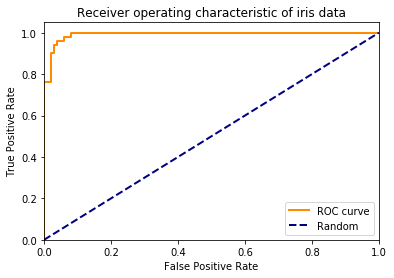

In [59]:
# Ideally, generate a curve for each target. Do it in a loop.
fpr, tpr, _ = metrics.roc_curve(iris.target, y_proba[:,1], pos_label=1)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of iris data')
plt.legend(loc="lower right")
plt.show()

## Tasks

| |actual cancer | actual no cancer |
|--|--|--|
|diagnosed cancer|8|90|
|not diagnosed cancer|2|900|

- Above is a (simulated) confusion matrix for breast cancer diagnosis.
  - What is the probability that a person has cancer given that they have a diagnosis? (Find p(cancer|diag))
  
## Bonus

- Load the digits dataset from the previous workshop, classify with a naive bayes classifier and plot the ROC curve.
- Compare that to another classifier

# Notebook Exercise 3: Changing Times

This exercise is about looking at how _robust_ a model is. There are a range of recent libraries that you might want to look at too (https://github.com/marcotcr/lime or https://github.com/IBM/adversarial-robustness-toolbox). Let's try adding some jitter to a model to see how it performs after adding noise.

In [0]:
#@title
from sklearn import metrics, datasets, naive_bayes, svm, tree
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from pandas import Series
from matplotlib import pyplot

What we would expect is something like the following. If we have a model that grossly overfits the data, it is likely to start high (e.g. lookup table). Because it hasn't made any generalisations, as soon as we start adding noise performance will quickly drop.

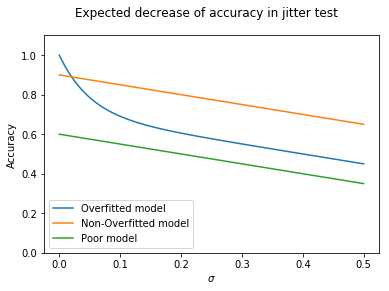

In [61]:
x = np.linspace(0, 0.5, 100)

plt.plot( x, 0.7 - 0.5*x + 0.3*np.exp(-x*20), label = "Overfitted model")
plt.plot( x, 0.9 - 0.5*x, label = "Non-Overfitted model")
plt.plot( x, 0.6 - 0.5*x, label = "Poor model")

axes = plt.gca()
axes.set_ylim([0, 1.1])

plt.legend(loc=3)
plt.suptitle("Expected decrease of accuracy in jitter test")

axes.set_xlabel('$\sigma$')
axes.set_ylabel('Accuracy')

plt.show()

## Jitter methods

"Jitter" is simply some noise added to the original signal.

Below a `jitter_test` runs a prediction on the new jitter data over several different jitter scales (standard deviations). To make the resulting curves a little smoother, we're performing the experiment several times and taking the average.

In [0]:
def jitter(X, scale=0.1):
    return X + np.random.normal(0, scale, X.shape)

def jitter_test(classifier, X, y, scales = np.linspace(0, 0.5, 30), N = 5):
    out = []
    for s in scales:
        avg = 0.0
        for r in range(N):
            avg += metrics.accuracy_score(y, classifier.predict(jitter(X, s)))
        out.append(avg / N)
    return out, scales

Below we're generating the test data. We're using the moons dataset to make it quite difficult.

In [0]:
np.random.seed(1234)
X, y = datasets.make_moons(n_samples=200, noise=.3)

In [64]:
mdl1 = svm.SVC()
mdl1.fit(X, y)

mdl2 = tree.DecisionTreeClassifier()
mdl2.fit(X,y);

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
mdl1_scores, jitters = jitter_test(mdl1, X, y)
mdl2_scores, jitters = jitter_test(mdl2, X, y)

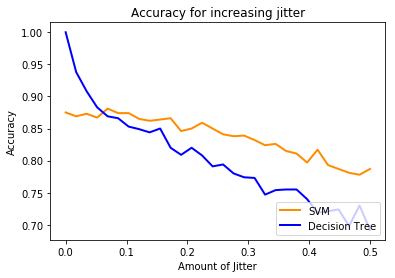

In [66]:
plt.figure()
lw = 2
plt.plot(jitters, mdl1_scores, color='darkorange',
         lw=lw, label='SVM')
plt.plot(jitters, mdl2_scores, color='blue',
         lw=lw, label='Decision Tree')
plt.xlabel('Amount of Jitter')
plt.ylabel('Accuracy')
plt.title('Accuracy for increasing jitter')
plt.legend(loc="lower right")
plt.show()

Note how the decision tree result drops quickly. This is because even though we are just shifting the original data just a tiny bit, because it's so overfitted it quickly starts to misclassify data.

Which do you think is the better model?

## Bonus

- Write some code to plot the decision boundaries of the classifiers. To do this the easiest thing is to just generate a load of random x,y coords and use the model to generate the class. Compare that to the plot above.

Hint: Take a look at some of the other workshops.

## Trends

I just wanted to show you a really cool library for decomposing seasonal trends.

It's essentially fitting the multiplicative model:

$y(t) = Level * Trend * Seasonality * Noise$

Below we have some data from the 1950's showing the number of people (monthly, in thousands) flying with an airline. You can see that there is clearly some seasonal variation.

`statsmodels` is a comprehensive statistical library. It is has some overlap with `scipy.stats`, but is far more comprehensive.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


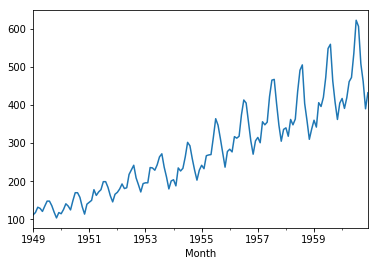

In [67]:
series = Series.from_csv('https://raw.githubusercontent.com/winderresearch/training-data-cleaning/master/data/airline-passengers.csv', header=0)
series.plot()
plt.show()

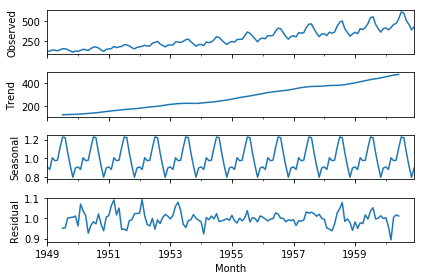

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

Note how well it de-seasonal-ises the data. After removing the seasonal variation the trend is quite consistent.